# CHIPS-CVN Evaluation

In [1]:
# The configuration yaml file must be specified
config_file = "./config/evaluate.yml"

In [2]:
# Import all the required modules and call the gpu_setup utility
import time
from array import array
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import ROOT
from root_numpy import fill_hist

import chipscvn.utils as utils
import chipscvn.config as config
import chipscvn.data as data
import chipscvn.models as models
import chipscvn.evaluators as evaluators
utils.gpu_setup()  # Setup the GPU's
ROOT.gStyle.SetOptStat(0)

/mnt/storage/jtingey/chips-cvn/env/miniconda/envs/chips-cvn/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Welcome to JupyROOT 6.18/04
---  4 Physical GPUs, 4 Logical GPUs ---


In [3]:
# Load the trained models from the configuration and run the evaluator
conf = config.get(config_file)
evaluator = utils.get_evaluator(conf)
evaluator.run()

--- Running Evaluation ---

--- running inference...

--- parsing outputs...

--- calculating weights...

Total-> Nuel: 17665, Numu: 18045, Cosmic: 15554

Weights-> Nuel:0.0045, Numu:0.1889, Cosmic:77.8383

--- calculating cuts...

--- Done (took 242.71230792999268 seconds) ---



2020-03-23 11:54:37.012774: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2020-03-23 11:54:37.295536: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7


## Cut Evaluation

First we evaluate how well the cuts remove background events...

In [4]:
# Plot the 'r_raw_total_digi_q' which we cut on
y_max = 0.13
hists, leg = evaluator.combined_cat_plot('r_raw_total_digi_q', 40, 0, 5000, 0, y_max, 'norm', False, False)
c = ROOT.TCanvas("r_raw_total_digi_q", 'r_raw_total_digi_q', 800, 600)
for hist in hists:
    hist.Draw("HISTSAME")
leg.Draw()

cut_line = ROOT.TLine(conf.eval.cuts.q, 0, conf.eval.cuts.q, y_max)
cut_line.SetLineWidth(3)
cut_line.SetLineColor(14)
cut_line.Draw()

cut_box = ROOT.TBox(0, 0, conf.eval.cuts.q, y_max)
cut_box.SetFillColor(14)
cut_box.SetFillStyle(3345)
cut_box.Draw()

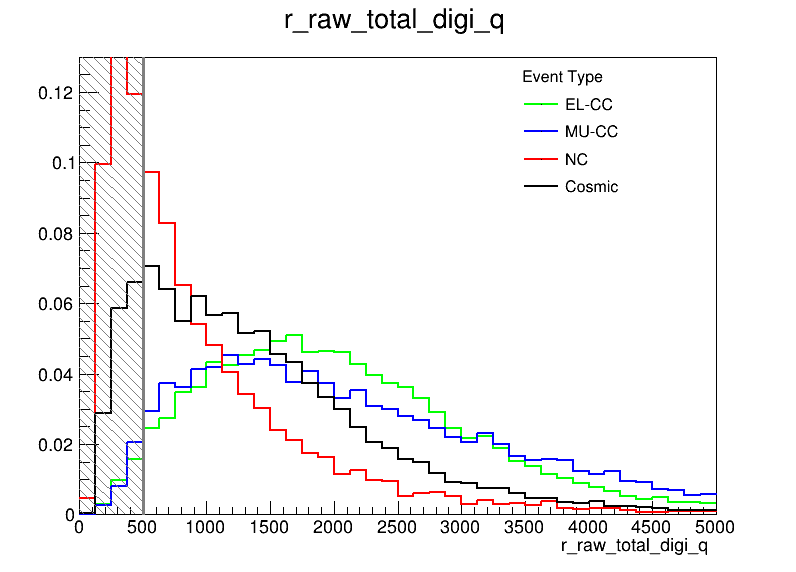

In [5]:
c.Draw()

In [6]:
# Plot the 'r_first_ring_height' which we cut on
y_max = 0.15
hists, leg = evaluator.combined_cat_plot('r_first_ring_height', 40, 0, 5000, 0, y_max, 'norm', False, False)
c = ROOT.TCanvas("r_first_ring_height", 'r_first_ring_height', 800, 600)
for hist in hists:
    hist.Draw("HISTSAME")
leg.Draw()

cut_line = ROOT.TLine(conf.eval.cuts.hough, 0, conf.eval.cuts.hough, y_max)
cut_line.SetLineWidth(3)
cut_line.SetLineColor(14)
cut_line.Draw()

cut_box = ROOT.TBox(0, 0, conf.eval.cuts.hough, y_max)
cut_box.SetFillColor(14)
cut_box.SetFillStyle(3345)
cut_box.Draw()

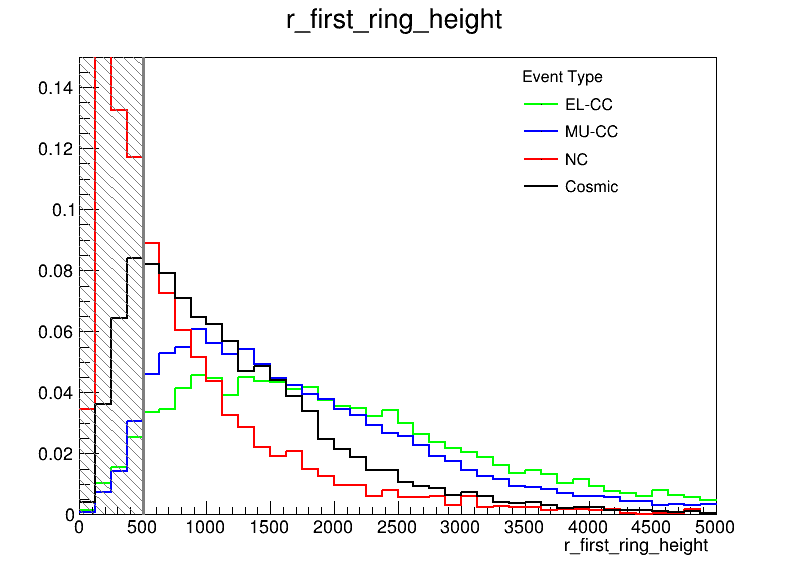

In [7]:
c.Draw()

In [8]:
# Plot the 'r_dirTheta' which we cut on
y_max = 0.25
hists, leg = evaluator.combined_cat_plot('r_dirTheta', 64, -1, 1, 0, y_max, 'norm', False, False)
c = ROOT.TCanvas("r_dirTheta", 'r_dirTheta', 800, 600)
for hist in hists:
    hist.Draw("HISTSAME")
leg.Draw()

cut_line_low = ROOT.TLine(-conf.eval.cuts.theta, 0, -conf.eval.cuts.theta, y_max)
cut_line_low.SetLineWidth(3)
cut_line_low.SetLineColor(14)
cut_line_low.Draw()
cut_box_low = ROOT.TBox(-1, 0, -conf.eval.cuts.theta, y_max)
cut_box_low.SetFillColor(14)
cut_box_low.SetFillStyle(3345)
cut_box_low.Draw()

cut_line_high = ROOT.TLine(conf.eval.cuts.theta, 0, conf.eval.cuts.theta, y_max)
cut_line_high.SetLineWidth(3)
cut_line_high.SetLineColor(14)
cut_line_high.Draw()
cut_box_high = ROOT.TBox(conf.eval.cuts.theta, 0, 1, y_max)
cut_box_high.SetFillColor(14)
cut_box_high.SetFillStyle(3345)
cut_box_high.Draw()

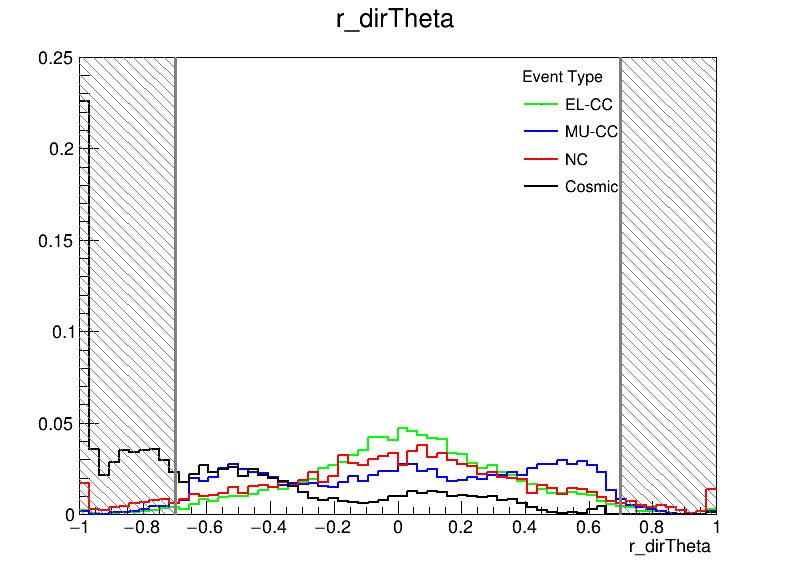

In [9]:
c.Draw()

In [10]:
# Plot the 'r_dirPhi' which we cut on
y_max = 0.18
hists, leg = evaluator.combined_cat_plot('r_dirPhi', 64, -1, 1, 0, y_max, 'norm', False, False)
c = ROOT.TCanvas("r_dirPhi", 'r_dirPhi', 800, 600)
for hist in hists:
    hist.Draw("HISTSAME")
leg.Draw()

cut_line_low = ROOT.TLine(-conf.eval.cuts.phi, 0, -conf.eval.cuts.phi, y_max)
cut_line_low.SetLineWidth(3)
cut_line_low.SetLineColor(14)
cut_line_low.Draw()
cut_box_low = ROOT.TBox(-1, 0, -conf.eval.cuts.phi, y_max)
cut_box_low.SetFillColor(14)
cut_box_low.SetFillStyle(3345)
cut_box_low.Draw()

cut_line_high = ROOT.TLine(conf.eval.cuts.phi, 0, conf.eval.cuts.phi, y_max)
cut_line_high.SetLineWidth(3)
cut_line_high.SetLineColor(14)
cut_line_high.Draw()
cut_box_high = ROOT.TBox(conf.eval.cuts.phi, 0, 1, y_max)
cut_box_high.SetFillColor(14)
cut_box_high.SetFillStyle(3345)
cut_box_high.Draw()

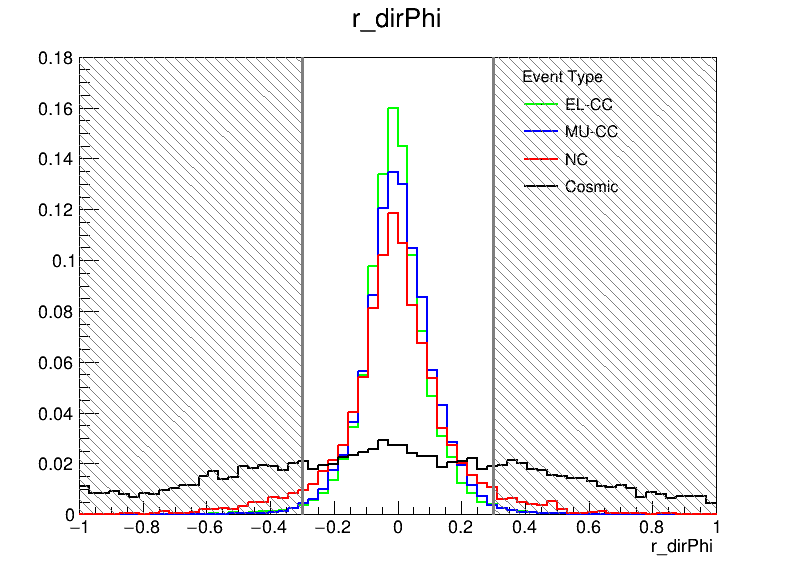

In [11]:
c.Draw()

In [12]:
# Print how these cuts affect the different categories
evaluator.base_cut_summary()

Base Cut Summary...

Nuel-CC-> Total 14996, Survived: 0.9137103227527341

Numu-CC-> Total 14970, Survived: 0.8953239812959252

NC-> Total 5744, Survived: 0.5104456824512534

Cosmic-> Total 15554, Survived: 0.20515622990870516



## Cosmic Classifier Evaluation

Next we will evaluate how well the cosmic classifier performed...

In [13]:
# Plot the cosmic output which we cut on
hists, leg = evaluator.combined_cat_plot('c_out', 50, 0, 1.0001, 0, 1, 'norm', True, False)
c = ROOT.TCanvas("c_out", 'c_out', 800, 600)
for hist in hists:
    hist.Draw("HISTSAME")
#leg.Draw()

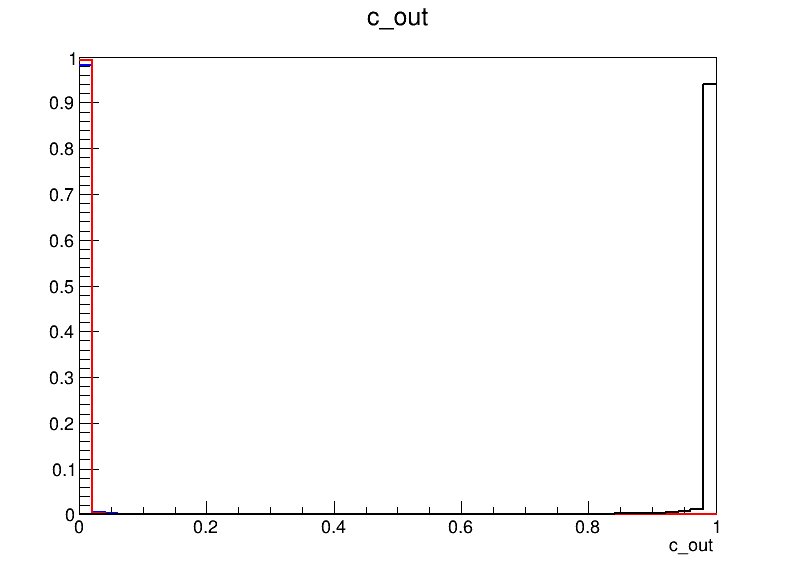

In [14]:
c.Draw()

In [15]:
# Print how this cut affects the different categories

print("Applying cut at cosmic output value: {}\n".format(conf.eval.cuts.cosmic))

evaluator.combined_cut_summary()

Applying cut at cosmic output value: 0.001

Base + Cosmic Cut Summary...

Nuel-CC-> Total 14996, Survived: 0.8906375033342224

Numu-CC-> Total 14970, Survived: 0.8548430193720775

NC-> Total 5744, Survived: 0.498433147632312

Cosmic-> Total 15554, Survived: 0.0



In [16]:
# Plot the true nuEnergy with base_cut and cosmic_cut
hists, leg = evaluator.combined_cat_plot('t_nuEnergy', 40, 0, 8000, 0, 0.09, 'norm', True, True)
c = ROOT.TCanvas("t_nuEnergy", 't_nuEnergy', 800, 600)
for hist in hists:
    hist.Draw("HISTSAME")
leg.Draw()

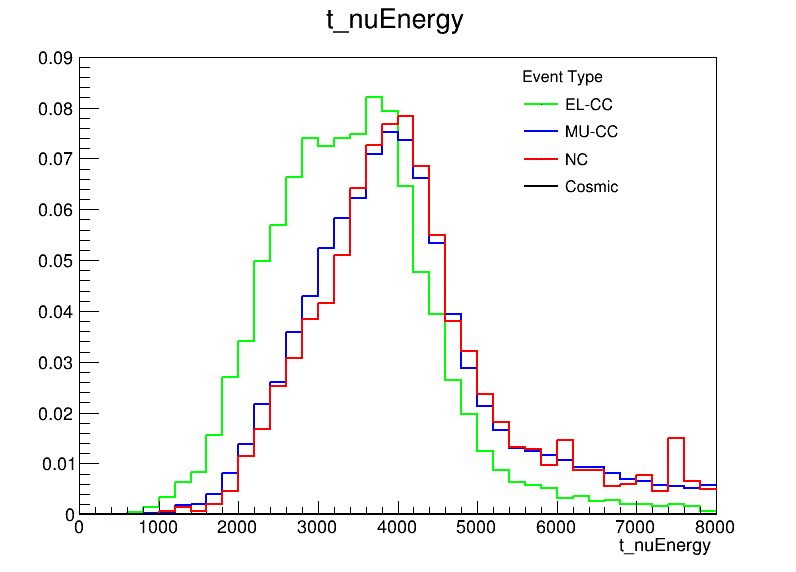

In [17]:
c.Draw()

## Beam Classifier Evaluation

Next we will evaluate how well the beam classifier performed...

In [18]:
# Plot the 'nuel_score' with the cuts applied and normalised per event type
nuel_hists, leg = evaluator.combined_cat_plot('nuel_score', 50, 0, 1, 0, 0.1, 'norm', True, True)
c = ROOT.TCanvas("nuel_score", 'nuel_score', 800, 600)
for hist in nuel_hists:
    hist.Draw("HISTSAME")
#leg.Draw()

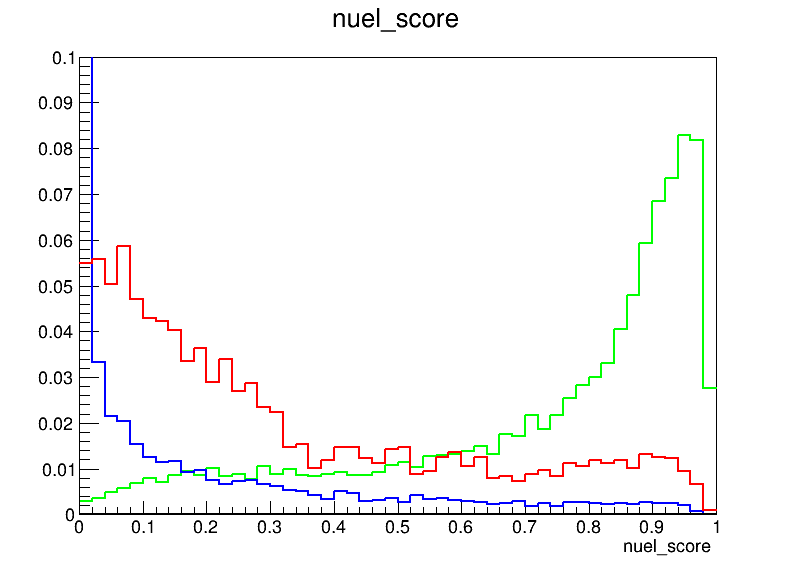

In [19]:
c.Draw()

In [20]:
# Plot the 'numu_score' with the cuts applied and normalised per event type
numu_hists, leg = evaluator.combined_cat_plot('numu_score', 50, 0, 1, 0, 0.7, 'norm', True, True)
c = ROOT.TCanvas("numu_score", 'numu_score', 800, 600)
for hist in numu_hists:
    hist.Draw("HISTSAME")
#leg.Draw()

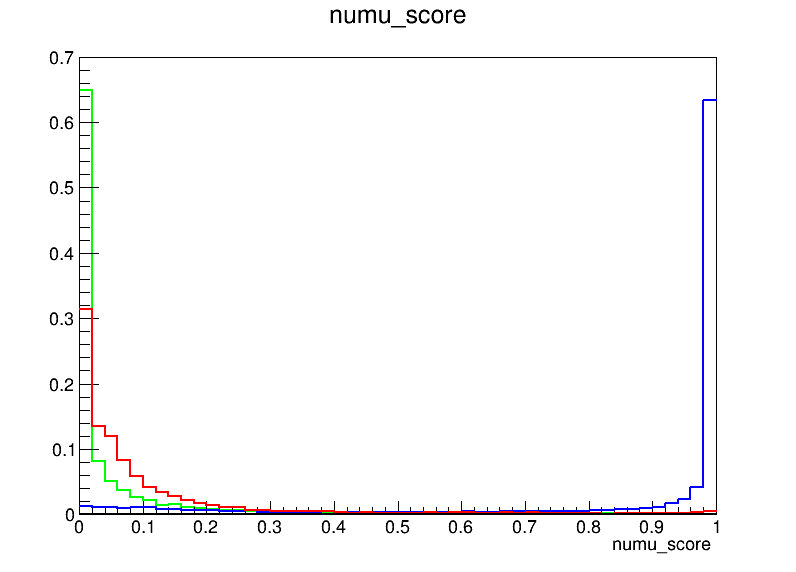

In [21]:
c.Draw()

In [22]:
# Plot the 'nc_score' with the cuts applied and normalised per event type
nc_hists, leg = evaluator.combined_cat_plot('nc_score', 50, 0, 1, 0, 0.1, 'norm', True, True)
c = ROOT.TCanvas("nc_score", 'nc_score', 800, 600)
for hist in nc_hists:
    hist.Draw("HISTSAME")
#leg.Draw()

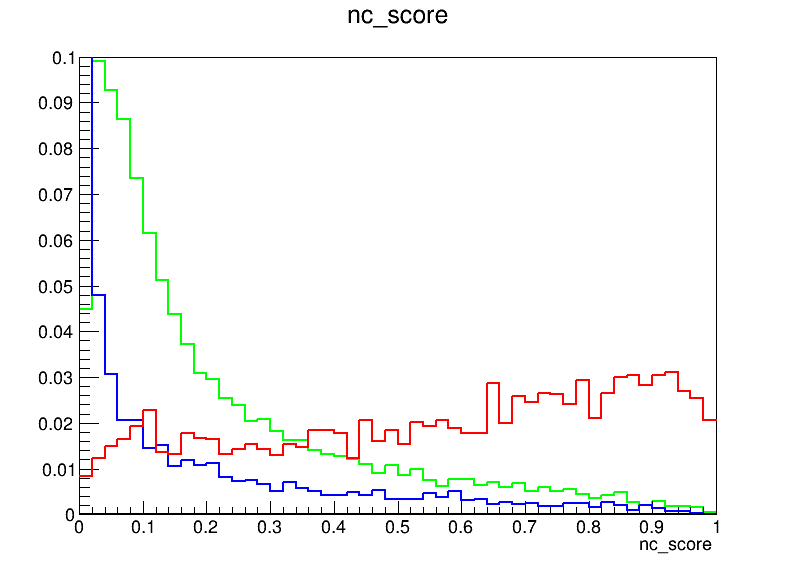

In [23]:
c.Draw()

In [24]:
# Run a scan on nuel_score and numu_score cuts to find maximum efficiency*purity for both
b_ev = evaluator.events[(evaluator.events.base_cut == 0) & (evaluator.events.cosmic_cut == 0)]

nuel_tot = b_ev[b_ev.t_full_cat == 0]['weight'].sum()
numu_tot = b_ev[b_ev.t_full_cat == 1]['weight'].sum()
nc_tot = b_ev[b_ev.t_full_cat == 2]['weight'].sum()
 
cut = array('d')
nuel_eff_sig, nuel_eff_bkg, nuel_pur, nuel_fom = array('d'), array('d'), array('d'), array('d')
numu_eff_sig, numu_eff_bkg, numu_pur, numu_fom = array('d'), array('d'), array('d'), array('d')
nc_eff_sig, nc_eff_bkg, nc_pur, nc_fom = array('d'), array('d'), array('d'), array('d')

bins = 100
nuel_max_fom = 0.0
numu_max_fom = 0.0
nc_max_fom = 0.0
nuel_max_fom_cut = 0
numu_max_fom_cut = 0
nc_max_fom_cut = 0

cut.append(0.0)
nuel_eff_sig.append(1.0)
numu_eff_sig.append(1.0)
nc_eff_sig.append(1.0)
nuel_eff_bkg.append(1.0)
numu_eff_bkg.append(1.0)
nc_eff_bkg.append(1.0)
nuel_pur.append(nuel_tot/(nuel_tot+numu_tot+nc_tot))
numu_pur.append(numu_tot/(nuel_tot+numu_tot+nc_tot))
nc_pur.append(nc_tot/(nuel_tot+numu_tot+nc_tot))
nuel_fom.append(nuel_eff_sig[0]*nuel_pur[0])
numu_fom.append(numu_eff_sig[0]*numu_pur[0])
nc_fom.append(nc_eff_sig[0]*nc_pur[0])

for bin in range(bins):
    cut.append((bin * 0.01) + 0.01)
    
    nuel_nuel_cut = b_ev[(b_ev.t_full_cat == 0) & (b_ev.nuel_score > cut[bin+1])]['weight'].sum()
    numu_nuel_cut = b_ev[(b_ev.t_full_cat == 1) & (b_ev.nuel_score > cut[bin+1])]['weight'].sum()
    nc_nuel_cut = b_ev[(b_ev.t_full_cat == 2) & (b_ev.nuel_score > cut[bin+1])]['weight'].sum()
    
    nuel_numu_cut = b_ev[(b_ev.t_full_cat == 0) & (b_ev.numu_score > cut[bin+1])]['weight'].sum()
    numu_numu_cut = b_ev[(b_ev.t_full_cat == 1) & (b_ev.numu_score > cut[bin+1])]['weight'].sum()
    nc_numu_cut = b_ev[(b_ev.t_full_cat == 2) & (b_ev.numu_score > cut[bin+1])]['weight'].sum()
    
    nuel_nc_cut = b_ev[(b_ev.t_full_cat == 0) & (b_ev.nc_score > cut[bin+1])]['weight'].sum()
    numu_nc_cut = b_ev[(b_ev.t_full_cat == 1) & (b_ev.nc_score > cut[bin+1])]['weight'].sum()
    nc_nc_cut = b_ev[(b_ev.t_full_cat == 2) & (b_ev.nc_score > cut[bin+1])]['weight'].sum()
    
    nuel_eff_sig.append(nuel_nuel_cut/nuel_tot)
    numu_eff_sig.append(numu_numu_cut/numu_tot)
    nc_eff_sig.append(nc_nc_cut/nc_tot)
    
    nuel_eff_bkg.append((numu_nuel_cut+nc_nuel_cut)/(numu_tot+nc_tot))
    numu_eff_bkg.append((nuel_numu_cut+nc_numu_cut)/(nuel_tot+nc_tot))
    nc_eff_bkg.append((nuel_nc_cut+numu_nc_cut)/(nuel_tot+numu_tot))
    
    if nuel_eff_sig[bin+1] == 0.0 or nuel_eff_bkg[bin+1] == 0.0:
        nuel_pur.append(0.0)
        nuel_fom.append(0.0)
    else:
        nuel_pur.append(nuel_nuel_cut/(nuel_nuel_cut+numu_nuel_cut+nc_nuel_cut))
        nuel_fom.append(nuel_eff_sig[bin]*nuel_pur[bin])
        
    if numu_eff_sig[bin+1] == 0.0 or numu_eff_bkg[bin+1] == 0.0:
        numu_pur.append(0.0)
        numu_fom.append(0.0)
    else:
        numu_pur.append(numu_numu_cut/(nuel_numu_cut+numu_numu_cut+nc_numu_cut))
        numu_fom.append(numu_eff_sig[bin]*numu_pur[bin])
        
    if nc_eff_sig[bin+1] == 0.0 or nc_eff_bkg[bin+1] == 0.0:
        nc_pur.append(0.0)
        nc_fom.append(0.0)
    else:
        nc_pur.append(nc_nc_cut/(nuel_nc_cut+numu_nc_cut+nc_nc_cut))
        nc_fom.append(nc_eff_sig[bin]*nc_pur[bin])
        
    #print("Cut: {0:.4f}, Sig Eff:{1:.4f}, Bkg Eff: {2:.4f}, Pur: {3:.4f}, Fom: {4:.4f}".format(
    #    cut[bin+1], nuel_eff_sig[bin+1], nuel_eff_bkg[bin+1], nuel_pur[bin+1], nuel_fom[bin+1]))
    #print("Cut: {0:.4f}, Sig Eff:{1:.4f}, Bkg Eff: {2:.4f}, Pur: {3:.4f}, Fom: {4:.4f}".format(
    #    cut[bin+1], numu_eff_sig[bin+1], numu_eff_bkg[bin+1], numu_pur[bin+1], numu_fom[bin+1]))
    #print("Cut: {0:.4f}, Sig Eff:{1:.4f}, Bkg Eff: {2:.4f}, Pur: {3:.4f}, Fom: {4:.4f}".format(
    #    cut[bin+1], nc_eff_sig[bin+1], nc_eff_bkg[bin+1], nc_pur[bin+1], nc_fom[bin+1]))

    if nuel_fom[bin] > nuel_max_fom: 
        nuel_max_fom = nuel_fom[bin] 
        nuel_max_fom_cut = cut[bin]
        
    if numu_fom[bin] > numu_max_fom: 
        numu_max_fom = numu_fom[bin] 
        numu_max_fom_cut = cut[bin]
        
    if nc_fom[bin] > nc_max_fom: 
        nc_max_fom = nc_fom[bin] 
        nc_max_fom_cut = cut[bin]

In [25]:
nuel_eff_sig_g = ROOT.TGraph(bins+1, cut, nuel_eff_sig)
nuel_eff_sig_g.SetName("nuel_eff_sig_g")
nuel_eff_bkg_g = ROOT.TGraph(bins+1, cut, nuel_eff_bkg)
nuel_eff_bkg_g.SetName("nuel_eff_bkg_g")
nuel_pur_g = ROOT.TGraph(bins+1, cut, nuel_pur)
nuel_pur_g.SetName("nuel_pur_g")
nuel_fom_g = ROOT.TGraph(bins+1, cut, nuel_fom)
nuel_fom_g.SetName("nuel_fom_g")
nuel_eff_vs_bkg_g = ROOT.TGraph(bins+1, nuel_eff_bkg, nuel_eff_sig)
nuel_eff_vs_bkg_g.SetName("nuel_eff_vs_bkg_g")

c = ROOT.TCanvas("c", "", 800, 600)
c.cd()

nuel_eff_sig_g.SetLineColor(ROOT.kGreen)     
nuel_eff_sig_g.SetLineWidth(2)
nuel_eff_sig_g.SetMarkerColor(ROOT.kGreen)
nuel_eff_sig_g.SetTitle("Scan across nuel_score cut")
nuel_eff_sig_g.GetXaxis().SetTitle('nuel_score cut')
nuel_eff_sig_g.GetXaxis().SetRangeUser(0, 1)
nuel_eff_sig_g.GetYaxis().SetRangeUser(0, 1)
nuel_eff_sig_g.Draw("sameALP")

nuel_eff_bkg_g.SetLineColor(ROOT.kBlue)     
nuel_eff_bkg_g.SetLineWidth(2)
nuel_eff_bkg_g.SetMarkerColor(ROOT.kBlue)
nuel_eff_bkg_g.Draw("sameLP")

nuel_pur_g.SetLineColor(ROOT.kRed)     
nuel_pur_g.SetLineWidth(2)
nuel_pur_g.SetMarkerColor(ROOT.kRed)
nuel_pur_g.Draw("sameLP")

nuel_fom_g.SetLineColor(ROOT.kBlack)     
nuel_fom_g.SetLineWidth(2)
nuel_fom_g.SetMarkerColor(ROOT.kBlack)
nuel_fom_g.Draw("sameLP")

nuel_eff_vs_bkg_g.SetLineColor(ROOT.kYellow)     
nuel_eff_vs_bkg_g.SetLineWidth(2)
nuel_eff_vs_bkg_g.SetMarkerColor(ROOT.kYellow)
nuel_eff_vs_bkg_g.Draw("sameLP")

leg = ROOT.TLegend(0.65, 0.65, 0.85, 0.85)
leg.AddEntry(nuel_eff_sig_g, "Sig Eff", "LP")
leg.AddEntry(nuel_eff_bkg_g, "Bkg Eff", "LP")
leg.AddEntry(nuel_pur_g, "Purity", "LP")
leg.AddEntry(nuel_fom_g, "FOM", "LP")
leg.AddEntry(nuel_eff_vs_bkg_g, "SigVsBkg", "LP")
leg.SetTextSize(0.03)
leg.SetTextFont(42)
leg.SetFillColor(42)
leg.SetFillStyle(1001)
leg.Draw()

c.SetGridx()
c.SetGridy()
c.Update()

Max Figure-of-merit: 0.15895551894967513, at cut value: 0.75


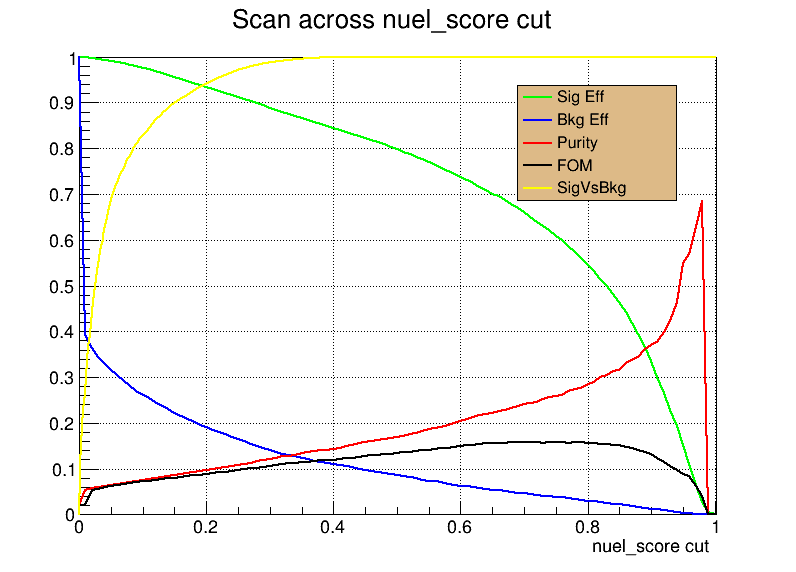

In [26]:
c.Draw()
print("Max Figure-of-merit: {}, at cut value: {}".format(nuel_max_fom, nuel_max_fom_cut))

In [27]:
numu_eff_sig_g = ROOT.TGraph(bins+1, cut, numu_eff_sig)
numu_eff_sig_g.SetName("numu_eff_sig_g")
numu_eff_bkg_g = ROOT.TGraph(bins+1, cut, numu_eff_bkg)
numu_eff_bkg_g.SetName("numu_eff_bkg_g")
numu_pur_g = ROOT.TGraph(bins+1, cut, numu_pur)
numu_pur_g.SetName("numu_pur_g")
numu_fom_g = ROOT.TGraph(bins+1, cut, numu_fom)
numu_fom_g.SetName("numu_fom_g")
numu_eff_vs_bkg_g = ROOT.TGraph(bins+1, numu_eff_bkg, numu_eff_sig)
numu_eff_vs_bkg_g.SetName("numu_eff_vs_bkg_g")

c = ROOT.TCanvas("c", "", 800, 600)
c.cd()

numu_eff_sig_g.SetLineColor(ROOT.kGreen)     
numu_eff_sig_g.SetLineWidth(2)
numu_eff_sig_g.SetMarkerColor(ROOT.kGreen)
numu_eff_sig_g.SetTitle("Scan across numu_score cut")
numu_eff_sig_g.GetXaxis().SetTitle('numu_score cut')
numu_eff_sig_g.GetXaxis().SetRangeUser(0, 1)
numu_eff_sig_g.GetYaxis().SetRangeUser(0, 1)
numu_eff_sig_g.Draw("sameALP")

numu_eff_bkg_g.SetLineColor(ROOT.kBlue)     
numu_eff_bkg_g.SetLineWidth(2)
numu_eff_bkg_g.SetMarkerColor(ROOT.kBlue)
numu_eff_bkg_g.Draw("sameLP")

numu_pur_g.SetLineColor(ROOT.kRed)     
numu_pur_g.SetLineWidth(2)
numu_pur_g.SetMarkerColor(ROOT.kRed)
numu_pur_g.Draw("sameLP")

numu_fom_g.SetLineColor(ROOT.kBlack)     
numu_fom_g.SetLineWidth(2)
numu_fom_g.SetMarkerColor(ROOT.kBlack)
numu_fom_g.Draw("sameLP")

numu_eff_vs_bkg_g.SetLineColor(ROOT.kYellow)     
numu_eff_vs_bkg_g.SetLineWidth(2)
numu_eff_vs_bkg_g.SetMarkerColor(ROOT.kYellow)
numu_eff_vs_bkg_g.Draw("sameLP")

leg = ROOT.TLegend(0.65, 0.65, 0.85, 0.85)
leg.AddEntry(numu_eff_sig_g, "Sig Eff", "LP")
leg.AddEntry(numu_eff_bkg_g, "Bkg Eff", "LP")
leg.AddEntry(numu_pur_g, "Purity", "LP")
leg.AddEntry(numu_fom_g, "FOM", "LP")
leg.AddEntry(numu_eff_vs_bkg_g, "SigVsBkg", "LP")
leg.SetTextSize(0.03)
leg.SetTextFont(42)
leg.SetFillColor(42)
leg.SetFillStyle(1001)
leg.Draw()

c.SetGridx()
c.SetGridy()
c.Update()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


Max Figure-of-merit: 0.9022338683704373, at cut value: 0.09


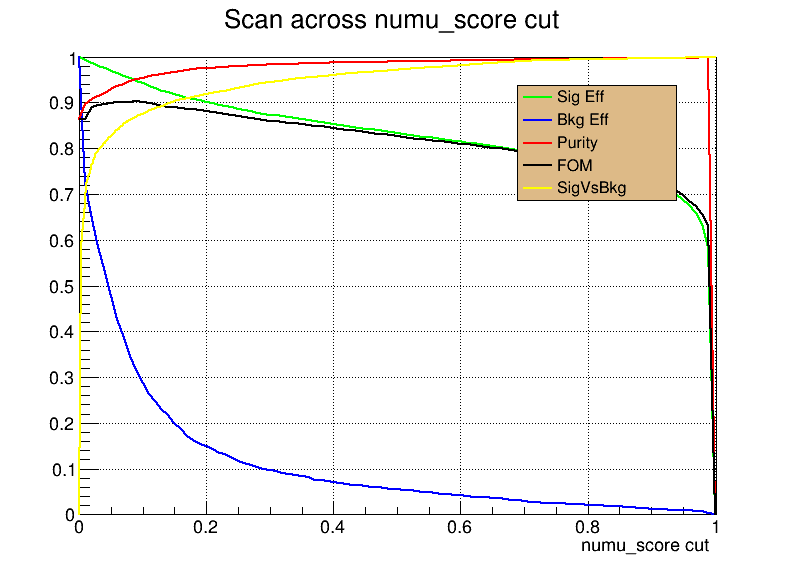

In [28]:
c.Draw()
print("Max Figure-of-merit: {}, at cut value: {}".format(numu_max_fom, numu_max_fom_cut))

In [29]:
nc_eff_sig_g = ROOT.TGraph(bins+1, cut, nc_eff_sig)
nc_eff_sig_g.SetName("nc_eff_sig_g")
nc_eff_bkg_g = ROOT.TGraph(bins+1, cut, nc_eff_bkg)
nc_eff_bkg_g.SetName("nc_eff_bkg_g")
nc_pur_g = ROOT.TGraph(bins+1, cut, nc_pur)
nc_pur_g.SetName("nc_pur_g")
nc_fom_g = ROOT.TGraph(bins+1, cut, nc_fom)
nc_fom_g.SetName("nc_fom_g")
nc_eff_vs_bkg_g = ROOT.TGraph(bins+1, nc_eff_bkg, nc_eff_sig)
nc_eff_vs_bkg_g.SetName("nc_eff_vs_bkg_g")

c = ROOT.TCanvas("c", "", 800, 600)
c.cd()

nc_eff_sig_g.SetLineColor(ROOT.kGreen)     
nc_eff_sig_g.SetLineWidth(2)
nc_eff_sig_g.SetMarkerColor(ROOT.kGreen)
nc_eff_sig_g.SetTitle("Scan across nc_score cut")
nc_eff_sig_g.GetXaxis().SetTitle('nc_score cut')
nc_eff_sig_g.GetXaxis().SetRangeUser(0, 1)
nc_eff_sig_g.GetYaxis().SetRangeUser(0, 1)
nc_eff_sig_g.Draw("sameALP")

nc_eff_bkg_g.SetLineColor(ROOT.kBlue)     
nc_eff_bkg_g.SetLineWidth(2)
nc_eff_bkg_g.SetMarkerColor(ROOT.kBlue)
nc_eff_bkg_g.Draw("sameLP")

nc_pur_g.SetLineColor(ROOT.kRed)     
nc_pur_g.SetLineWidth(2)
nc_pur_g.SetMarkerColor(ROOT.kRed)
nc_pur_g.Draw("sameLP")

nc_fom_g.SetLineColor(ROOT.kBlack)     
nc_fom_g.SetLineWidth(2)
nc_fom_g.SetMarkerColor(ROOT.kBlack)
nc_fom_g.Draw("sameLP")

nc_eff_vs_bkg_g.SetLineColor(ROOT.kYellow)     
nc_eff_vs_bkg_g.SetLineWidth(2)
nc_eff_vs_bkg_g.SetMarkerColor(ROOT.kYellow)
nc_eff_vs_bkg_g.Draw("sameLP")

leg = ROOT.TLegend(0.65, 0.65, 0.85, 0.85)
leg.AddEntry(nc_eff_sig_g, "Sig Eff", "LP")
leg.AddEntry(nc_eff_bkg_g, "Bkg Eff", "LP")
leg.AddEntry(nc_pur_g, "Purity", "LP")
leg.AddEntry(nc_fom_g, "FOM", "LP")
leg.AddEntry(nc_eff_vs_bkg_g, "SigVsBkg", "LP")
leg.SetTextSize(0.03)
leg.SetTextFont(42)
leg.SetFillColor(42)
leg.SetFillStyle(1001)
leg.Draw()

c.SetGridx()
c.SetGridy()
c.Update()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


Max Figure-of-merit: 0.3597326161645705, at cut value: 0.37


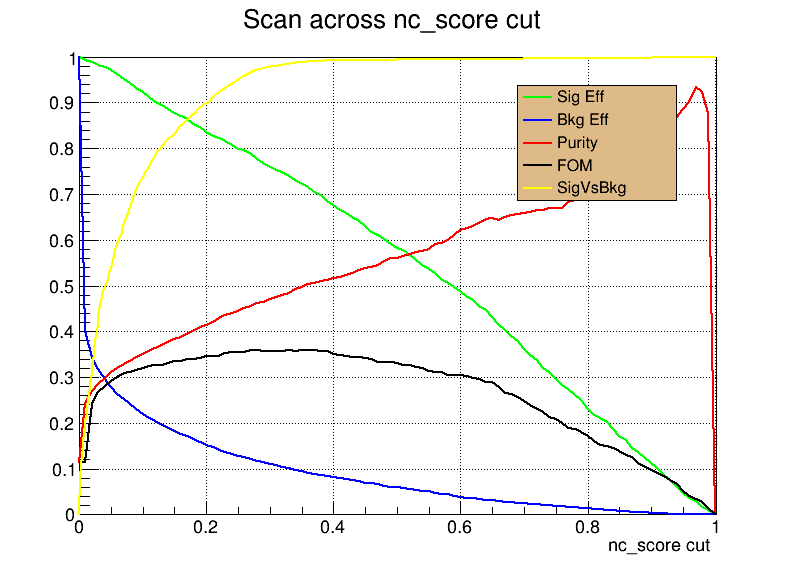

In [30]:
c.Draw()
print("Max Figure-of-merit: {}, at cut value: {}".format(nc_max_fom, nc_max_fom_cut))

In [31]:
# Generate efficiency and purity histograms using the maximised FOM
nuelCCAll = b_ev[b_ev.t_full_cat == 0]
nuelCCSel = b_ev[(b_ev.t_full_cat == 0) & (b_ev.base_cut == 0) & (b_ev.cosmic_cut == 0) & (b_ev.nuel_score > nuel_max_fom_cut)]
nuelCCAll_h = ROOT.TH1F("nuelCCAll", "", 10, 1000, 6000)
nuelCCSel_h = ROOT.TH1F("nuelCCSel", "", 10, 1000, 6000)
nuelCCAll_h.Sumw2()
nuelCCSel_h.Sumw2()
fill_hist(nuelCCAll_h, nuelCCAll['t_nuEnergy'].to_numpy(), nuelCCAll['weight'].to_numpy())
fill_hist(nuelCCSel_h, nuelCCSel['t_nuEnergy'].to_numpy(), nuelCCSel['weight'].to_numpy())
nuelCCEff = ROOT.TGraphAsymmErrors(nuelCCSel_h, nuelCCAll_h, "n")

numuCCAll = b_ev[b_ev.t_full_cat == 1]
numuCCSel = b_ev[(b_ev.t_full_cat == 1) & (b_ev.base_cut == 0) & (b_ev.cosmic_cut == 0) & (b_ev.nuel_score > nuel_max_fom_cut)]
numuCCAll_h = ROOT.TH1F("numuCCAll", "", 10, 1000, 6000)
numuCCSel_h = ROOT.TH1F("numuCCSel", "", 10, 1000, 6000)
numuCCAll_h.Sumw2()
numuCCSel_h.Sumw2()
fill_hist(numuCCAll_h, numuCCAll['t_nuEnergy'].to_numpy(), numuCCAll['weight'].to_numpy())
fill_hist(numuCCSel_h, numuCCSel['t_nuEnergy'].to_numpy(), numuCCSel['weight'].to_numpy())
numuCCEff = ROOT.TGraphAsymmErrors(numuCCSel_h, numuCCAll_h, "n")

ncAll = b_ev[b_ev.t_full_cat == 2]
ncSel = b_ev[(b_ev.t_full_cat == 2) & (b_ev.base_cut == 0) & (b_ev.cosmic_cut == 0) & (b_ev.nuel_score > nuel_max_fom_cut)]
ncAll_h = ROOT.TH1F("ncAll", "", 10, 1000, 6000)
ncSel_h = ROOT.TH1F("ncSel", "", 10, 1000, 6000)
ncAll_h.Sumw2()
ncSel_h.Sumw2()
fill_hist(ncAll_h, ncAll['t_nuEnergy'].to_numpy(), ncAll['weight'].to_numpy())
fill_hist(ncSel_h, ncSel['t_nuEnergy'].to_numpy(), ncSel['weight'].to_numpy())
ncEff = ROOT.TGraphAsymmErrors(ncSel_h, ncAll_h, "n")

cosmicAll = b_ev[b_ev.t_full_cat == 3]
cosmicSel = b_ev[(b_ev.t_full_cat == 3) & (b_ev.base_cut == 0) & (b_ev.cosmic_cut == 0) & (b_ev.nuel_score > nuel_max_fom_cut)]
cosmicAll_h = ROOT.TH1F("cosmicAll", "", 10, 1000, 6000)
cosmicSel_h = ROOT.TH1F("cosmicSel", "", 10, 1000, 6000)
cosmicAll_h.Sumw2()
cosmicSel_h.Sumw2()
fill_hist(cosmicAll_h, cosmicAll['t_nuEnergy'].to_numpy(), cosmicAll['weight'].to_numpy())
fill_hist(cosmicSel_h, cosmicSel['t_nuEnergy'].to_numpy(), cosmicSel['weight'].to_numpy())
cosmicEff = ROOT.TGraphAsymmErrors(cosmicSel_h, cosmicAll_h, "n")

signal = b_ev[(b_ev.t_full_cat == 0) & (b_ev.base_cut == 0) & (b_ev.cosmic_cut == 0) & (b_ev.nuel_score > nuel_max_fom_cut)]
total = b_ev[(b_ev.base_cut == 0) & (b_ev.cosmic_cut == 0) & (b_ev.nuel_score > nuel_max_fom_cut)]
signal_h = ROOT.TH1F("signal", "", 10, 1000, 6000)
total_h = ROOT.TH1F("total", "", 10, 1000, 6000)
signal_h.Sumw2()
total_h.Sumw2()
fill_hist(signal_h, signal['t_nuEnergy'].to_numpy(), signal['weight'].to_numpy())
fill_hist(total_h, total['t_nuEnergy'].to_numpy(), total['weight'].to_numpy())
purity = ROOT.TGraphAsymmErrors(signal_h, total_h, "n")

Warning in <TGraphAsymmErrors::Divide>: Number of graph points is different than histogram bins - 10 points have been skipped


In [32]:
# Make a efficiency and purity plot as a function of neutrino energy
eff_c = ROOT.TCanvas("eff_c", "", 800, 600)
eff_c.cd()

hempty = ROOT.TH2F("hempty", ";Neutrino Energy (MeV); Efficiency or Purity", 1, 1000, 6000, 10, 0, 1)
hempty.GetXaxis().SetTitleSize(0.06)  
hempty.GetYaxis().SetTitleSize(0.06) 
hempty.GetXaxis().CenterTitle()
hempty.GetXaxis().SetTitleOffset(0.8)  
hempty.GetYaxis().SetTitleOffset(0.8) 
hempty.GetYaxis().CenterTitle()
hempty.GetXaxis().SetLabelSize(0.05)    
hempty.GetYaxis().SetLabelSize(0.05)
hempty.Draw()

nuelCCEff.SetLineColor(ROOT.kGreen)     
nuelCCEff.SetLineWidth(2)
nuelCCEff.SetMarkerSize(1.2)    
nuelCCEff.SetMarkerStyle(20)
nuelCCEff.SetMarkerColor(ROOT.kGreen)
nuelCCEff.Draw("sameP")

numuCCEff.SetLineColor(ROOT.kBlue)     
numuCCEff.SetLineWidth(2)
numuCCEff.SetMarkerSize(1.2)    
numuCCEff.SetMarkerStyle(20)
numuCCEff.SetMarkerColor(ROOT.kBlue)
numuCCEff.Draw("sameP")

ncEff.SetLineColor(ROOT.kRed)     
ncEff.SetLineWidth(2)
ncEff.SetMarkerSize(1.2)    
ncEff.SetMarkerStyle(20)
ncEff.SetMarkerColor(ROOT.kRed)
ncEff.Draw("sameP")

cosmicEff.SetLineColor(ROOT.kBlack)     
cosmicEff.SetLineWidth(2)
cosmicEff.SetMarkerSize(1.2)    
cosmicEff.SetMarkerStyle(20)
cosmicEff.SetMarkerColor(ROOT.kBlack)
cosmicEff.Draw("sameP")

purity.SetLineColor(ROOT.kYellow)     
purity.SetLineWidth(2)
purity.SetMarkerSize(1.2)    
purity.SetMarkerStyle(20)
purity.SetMarkerColor(ROOT.kYellow)
purity.Draw("sameP")

leg = ROOT.TLegend(0.15, 0.65, 0.35, 0.85)
leg.AddEntry(nuelCCEff, "#nu_{e} CC Eff", "P")
leg.AddEntry(numuCCEff, "#nu_{#mu} CC Eff", "P")
leg.AddEntry(ncEff, "NC Eff", "P")
leg.AddEntry(cosmicEff, "Cosmic Eff", "P")
leg.AddEntry(purity, "#nu_{e} CC Purity", "P")
leg.SetTextSize(0.03)
leg.SetTextFont(42)
leg.SetFillColor(42)
leg.SetFillStyle(1001)
leg.Draw()
eff_c.Update()

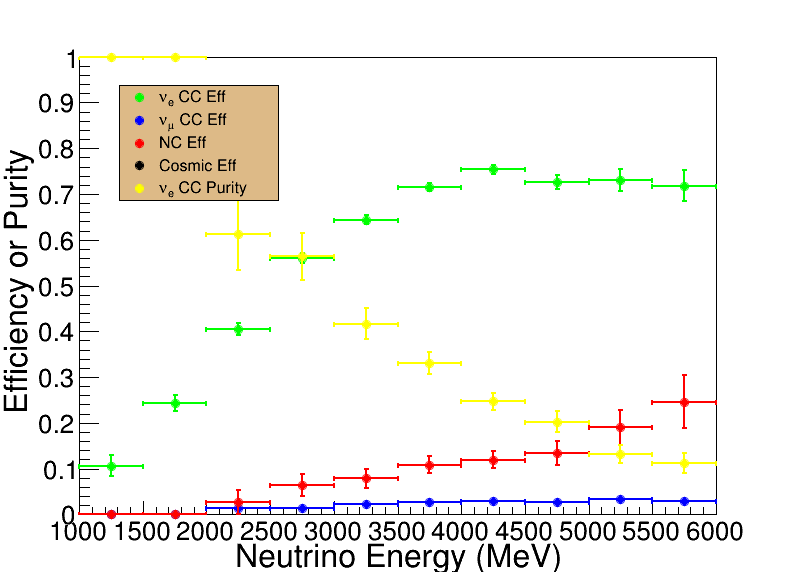

In [33]:
eff_c.Draw()

In [34]:
# Plot a confusion matrix for events that pass the cut
def pred_classifier(event):
    combined_values = [event['nuel_score'], event['numu_score'], event['nc_score']]
    return np.asarray(combined_values).argmax()
    
selection = evaluator.events[(evaluator.events.base_cut == False) & (evaluator.events.cosmic_cut == False)]
selection = selection[selection.t_full_cat != 3]
selection['pred_cat_combined'] = selection.apply(pred_classifier, axis=1)

full_cat_labels = ["EL-CC", "MU-CC", "NC"]
full_cat_labels_r = full_cat_labels[::-1]

matrix_full_cat = confusion_matrix(selection["t_full_cat"], selection["pred_cat_combined"], normalize='true')
matrix_full_cat = np.rot90(matrix_full_cat, 1)
matrix_full_cat = pd.DataFrame(matrix_full_cat, index=full_cat_labels_r, columns=full_cat_labels)

Text(123.0, 0.5, 'Predicted')

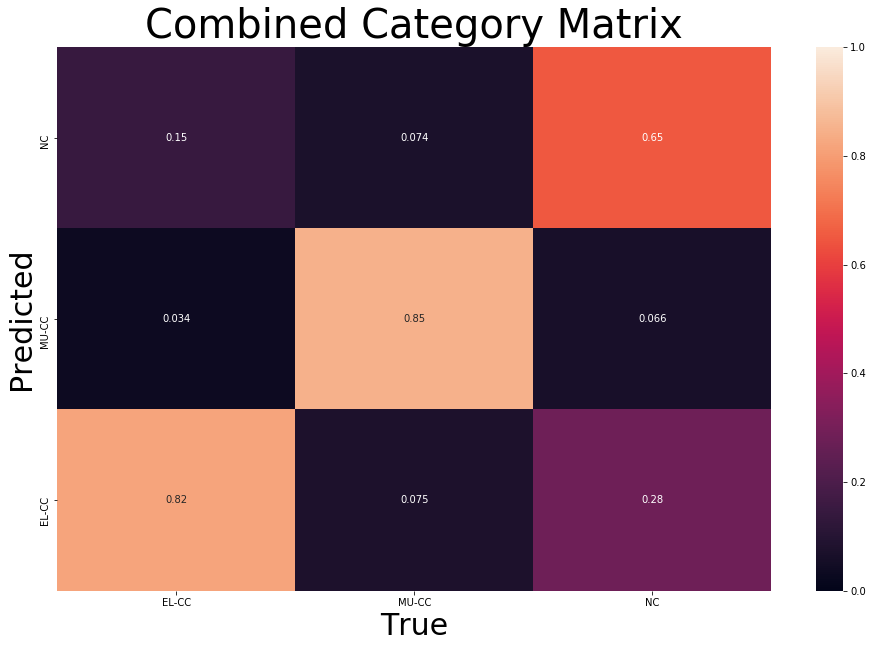

In [35]:
plt.figure(figsize=(16,10))
sns.heatmap(matrix_full_cat, annot=True, vmin=0.0, vmax=1.0)
plt.title('Combined Category Matrix', fontsize = 40) # title with fontsize 20
plt.xlabel('True', fontsize = 30) # x-axis label with fontsize 15
plt.ylabel('Predicted', fontsize = 30) # y-axis label with fontsize 15

In [36]:
# Print a Sklearn classification report
print(classification_report(selection["t_full_cat"], selection["pred_cat_combined"], target_names=full_cat_labels))

              precision    recall  f1-score   support

       EL-CC       0.86      0.82      0.84     13356
       MU-CC       0.94      0.85      0.90     12797
          NC       0.39      0.65      0.49      2863

    accuracy                           0.82     29016
   macro avg       0.73      0.77      0.74     29016
weighted avg       0.85      0.82      0.83     29016



In [37]:
def all_cat_classifier(event):
    combined_values = [event[('b_out_' + str(i))] for i in range(evaluator.b_model.categories)]
    return np.asarray(combined_values).argmax()

selection['pred_all_cat'] = selection.apply(all_cat_classifier, axis=1)
matrix_cat = confusion_matrix(selection[evaluator.b_model.cat], selection["pred_all_cat"], normalize='true')
matrix_cat = np.rot90(matrix_cat, 1)
matrix_cat = pd.DataFrame(matrix_cat, index=evaluator.b_model.labels[::-1], columns=evaluator.b_model.labels)

Text(123.0, 0.5, 'Predicted')

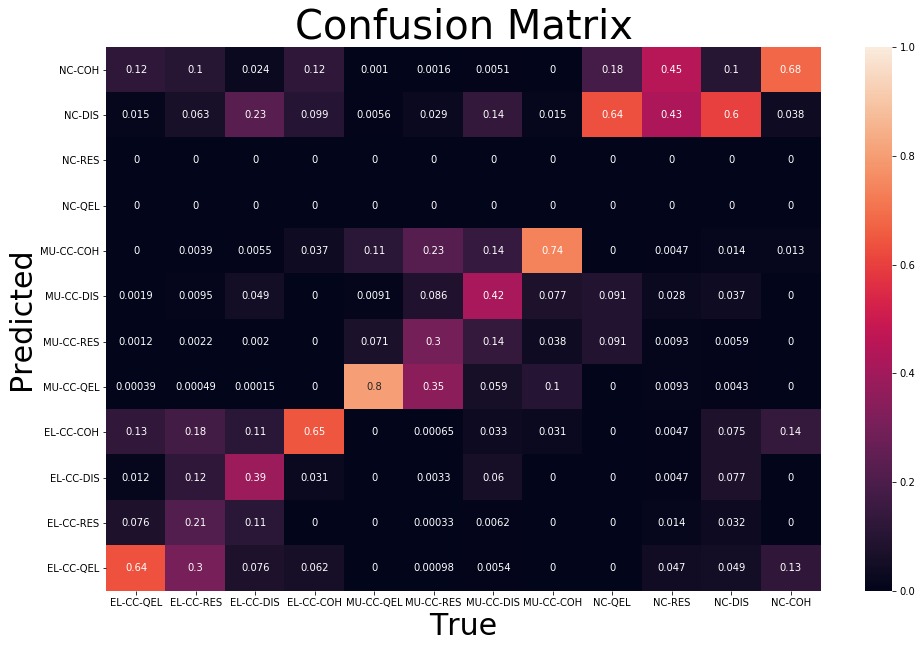

In [38]:
plt.figure(figsize=(16,10))
sns.heatmap(matrix_cat, annot=True, vmin=0.0, vmax=1.0)
plt.title('Confusion Matrix', fontsize = 40) # title with fontsize 20
plt.xlabel('True', fontsize = 30) # x-axis label with fontsize 15
plt.ylabel('Predicted', fontsize = 30) # y-axis label with fontsize 15

In [39]:
# Print a Sklearn classification report
print(classification_report(selection[evaluator.b_model.cat], selection["pred_all_cat"], target_names=evaluator.b_model.labels))

              precision    recall  f1-score   support

   EL-CC-QEL       0.46      0.64      0.54      2590
   EL-CC-RES       0.45      0.21      0.29      4117
   EL-CC-DIS       0.68      0.39      0.49      6487
   EL-CC-COH       0.04      0.65      0.08       162
   MU-CC-QEL       0.50      0.80      0.62      1973
   MU-CC-RES       0.43      0.30      0.35      3070
   MU-CC-DIS       0.81      0.42      0.55      7624
   MU-CC-COH       0.04      0.74      0.08       130
      NC-QEL       0.00      0.00      0.00        11
      NC-RES       0.00      0.00      0.00       215
      NC-DIS       0.34      0.60      0.43      2558
      NC-COH       0.04      0.68      0.07        79

    accuracy                           0.43     29016
   macro avg       0.32      0.45      0.29     29016
weighted avg       0.58      0.43      0.46     29016



In [40]:
# Look at the NC events that passed all the cuts
nc_passed_events = evaluator.events[(evaluator.events.base_cut == False) & 
                                    (evaluator.events.cosmic_cut == False) &
                                    (evaluator.events.nuel_score >= nuel_max_fom_cut) &
                                    (evaluator.events.t_full_cat == 2)]

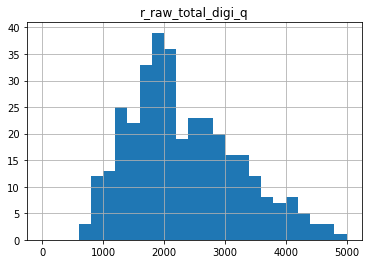

In [41]:
nc_passed_events.hist(column="r_raw_total_digi_q", range=[0,5000], bins=25)
plt.show()

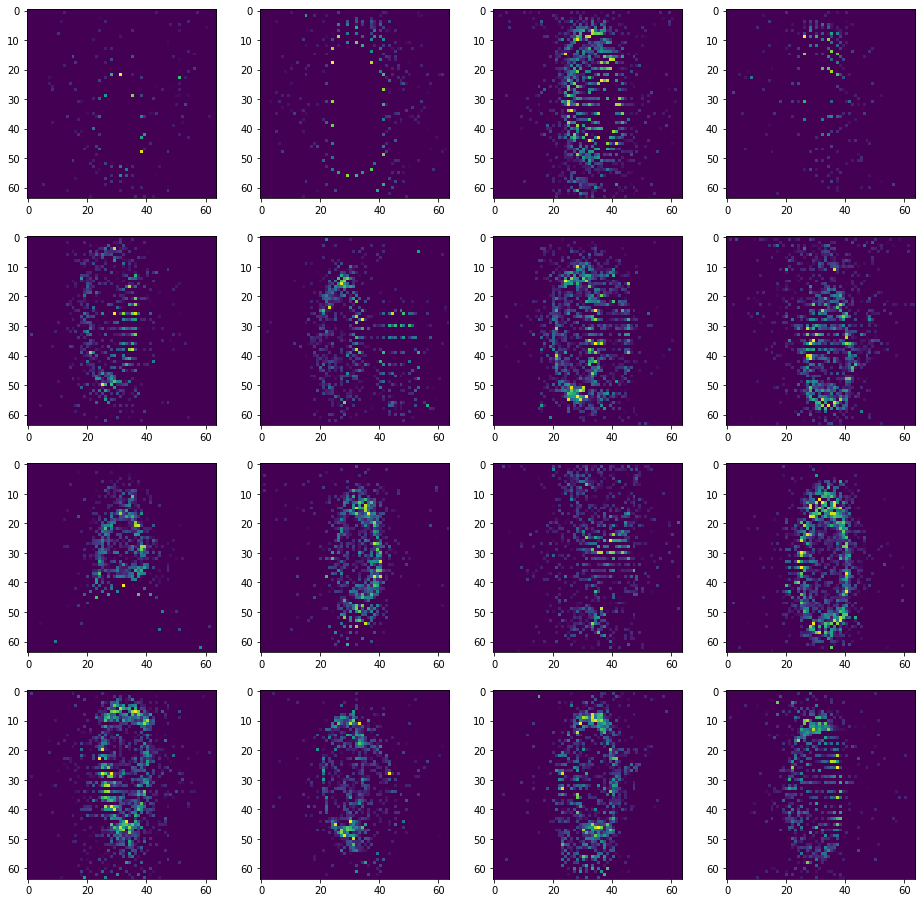

In [42]:
# Plot some example NC events that passed the cuts displaying their "charge_channel" 
fig=plt.figure(figsize=(16, 16))
columns, rows = 4, 4
for i in range(1, columns*rows +1):
    img = nc_passed_events['image_1'].values[i].reshape((64,64))
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

## Save Plots to file

We save the output plots to a root file in the model output directory...

In [43]:
import os

output_name = os.path.join(evaluator.config.models.beam.dir, evaluator.config.models.beam.path, "output.root")
beam_output = ROOT.TFile(output_name, 'RECREATE')

for i in range(4):
    nuel_hists[i].Write()
    numu_hists[i].Write()
    nc_hists[i].Write()

nuel_eff_sig_g.Write()
nuel_eff_bkg_g.Write()
nuel_pur_g.Write()
nuel_fom_g.Write()
nuel_eff_vs_bkg_g.Write()

numu_eff_sig_g.Write()
numu_eff_bkg_g.Write()
numu_pur_g.Write()
numu_fom_g.Write()
numu_eff_vs_bkg_g.Write()

nc_eff_sig_g.Write()
nc_eff_bkg_g.Write()
nc_pur_g.Write()
nc_fom_g.Write()
nc_eff_vs_bkg_g.Write()

nuelCCEff.SetName("nuelCCEff")
nuelCCEff.Write()
numuCCEff.SetName("numuCCEff")
numuCCEff.Write()
ncEff.SetName("ncEff")
ncEff.Write()
cosmicEff.SetName("cosmicEff")
cosmicEff.Write()
purity.SetName("purity")
purity.Write()

beam_output.Close()